In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from ipywidgets import HBox, VBox
import ipywidgets as widgets
from IPython import display
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from SensorimotorExploration.Systems.Parabola_v2 import ParabolicRegion as System
from SensorimotorExploration.Systems.Parabola_v2 import Instructor

In [3]:
f = 0.0
system = System()
system.set_f(f)
instructor = Instructor()
instructor.set_f(f)

title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'30'}

m_wdg = []
for i in range(2):
    m_wdg += [widgets.FloatSlider(value=0, min=0., max=6.,
                                 step=0.1,
                                 disabled=False,
                                 continuous_update=False,
                                 description = '$$m_'+str(i)+'$$',
                                 orientation='vertical',
                                 readout=True,
                                 readout_format='f',
                                 slider_color='white'
                                 )]
    
    
sensor1_lbl = widgets.Label( value="$$sensor_1$$",disabled=False)
sensor2_lbl = widgets.Label( value="$$sensor_2$$",disabled=False)
somato1_lbl = widgets.Label( value="$$somato_1$$",disabled=False)
somato2_lbl = widgets.Label( value="$$somato_2$$",disabled=False)
somato3_lbl = widgets.Label( value="$$somato_3$$",disabled=False)
somato4_lbl = widgets.Label( value="$$somato_4$$",disabled=False)
sensor1_txt = widgets.Text(value='Welcome',description='',disabled=True)
sensor2_txt = widgets.Text(value='Welcome',description='',disabled=True)
somato1_txt = widgets.Text(value='Welcome',description='',disabled=True)
somato2_txt = widgets.Text(value='Welcome',description='',disabled=True)
somato3_txt = widgets.Text(value='Welcome',description='',disabled=True)
somato4_txt = widgets.Text(value='Welcome',description='',disabled=True)

In [4]:
def plot_sys(f):
    system.set_f(f)
    instructor.set_f(f)

    matplotlib.rcParams['figure.figsize'] = (6.0, 9.0)
    matplotlib.rcParams.update({'font.size': 18})

    fig, ax = plt.subplots(1,1) 
    instructor.plot(axes=ax)
    plt.hold(True)
    system.drawSystem(axes=ax)
    ax.set_xlim([0,6])
    ax.set_ylim([system.min_sensor_values[1],system.max_sensor_values[1]])
    plt.xlabel('$s_1$',**axis_font)
    plt.ylabel('$s_2$',**axis_font)
    plt.legend(['Sensor units','Constraints'],loc='upper center',fontsize=15)   
    return fig, ax

def plot_result(foo):
    display.clear_output(wait=True)
    fig, ax = plot_sys(f)
    m = np.array([x.get_interact_value() for x in m_wdg])
    system.set_action(m)
    system.execute_action()
    plt.plot(system.sensor_out[0],system.sensor_out[1],'or')
    sensor1_txt.value = str(system.sensor_out[0])
    sensor2_txt.value = str(system.sensor_out[1])
    somato1_txt.value = str(system.somato_out[0])
    somato2_txt.value = str(system.somato_out[1])
    somato3_txt.value = str(system.somato_out[2])
    somato4_txt.value = str(system.somato_out[3])
#     print(system.sensor_out)
#     print(system.somato_out)

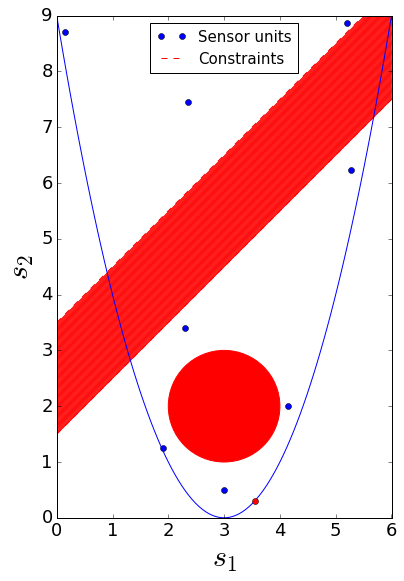

In [5]:
for x in m_wdg: 
    x.observe(plot_result,names='value')
display.display(HBox([HBox(m_wdg), 
                      VBox([HBox([sensor1_lbl,sensor1_txt]),
                            HBox([sensor2_lbl,sensor2_txt]),
                            HBox([somato1_lbl,somato1_txt]),
                            HBox([somato2_lbl,somato2_txt]),
                            HBox([somato3_lbl,somato3_txt]),
                            HBox([somato4_lbl,somato4_txt]),
                           ])]))

#Check m=[6,0]

In [8]:
# fig.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/Epirob 2017/images/system_parabola.eps',format='eps', dpi=1000)